Pretrained model just takes 2 to 5 iterations to get supar accuracy in our model

![codebasics - Transfer Learning Deep Learning Tutorial 27 (Tensorflow, Keras & Python) [LsdxvjLWkIY - 750x422 - 1m58s].png](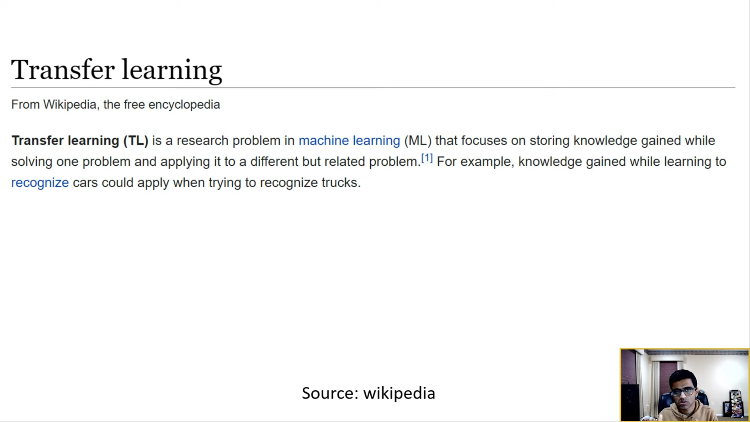)

![codebasics - Transfer Learning Deep Learning Tutorial 27 (Tensorflow, Keras & Python) [LsdxvjLWkIY - 750x422 - 2m29s].png](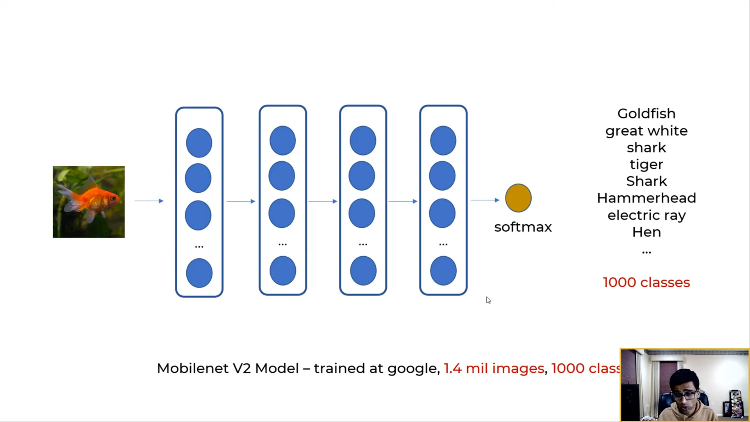)

![codebasics - Transfer Learning Deep Learning Tutorial 27 (Tensorflow, Keras & Python) [LsdxvjLWkIY - 750x422 - 3m44s].png](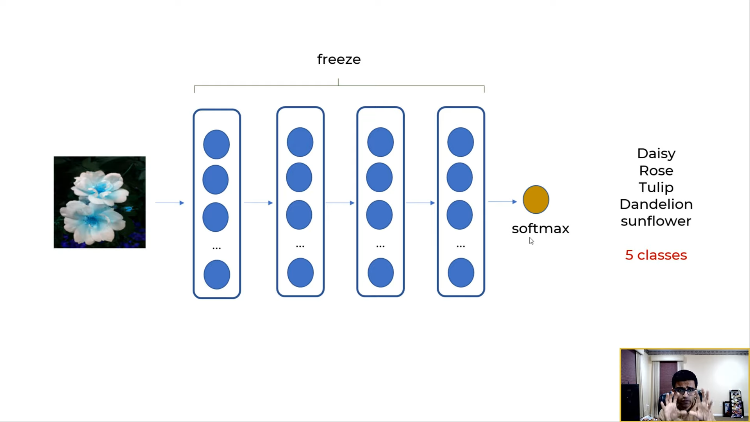)

We will use mobilenetV2 model to classify the flowers

Get an access of different pretrained models : tensorflow hub

**In this notebook we will use transfer learning and take pre-trained model from google's Tensorflow Hub and re-train that on flowers dataset. Using pre-trained model saves lot of time and computational budget for new classification problem at hand**

In [5]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [6]:
IMAGE_SHAPE = (224,224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",input_shape = IMAGE_SHAPE+(3,))
])

In [7]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

Model ready hai to classify into those 1000 classees.


Let's download any image and see it's prediction. It has school bus, pitza , toilet tissue etc. Let's try to predict pitza

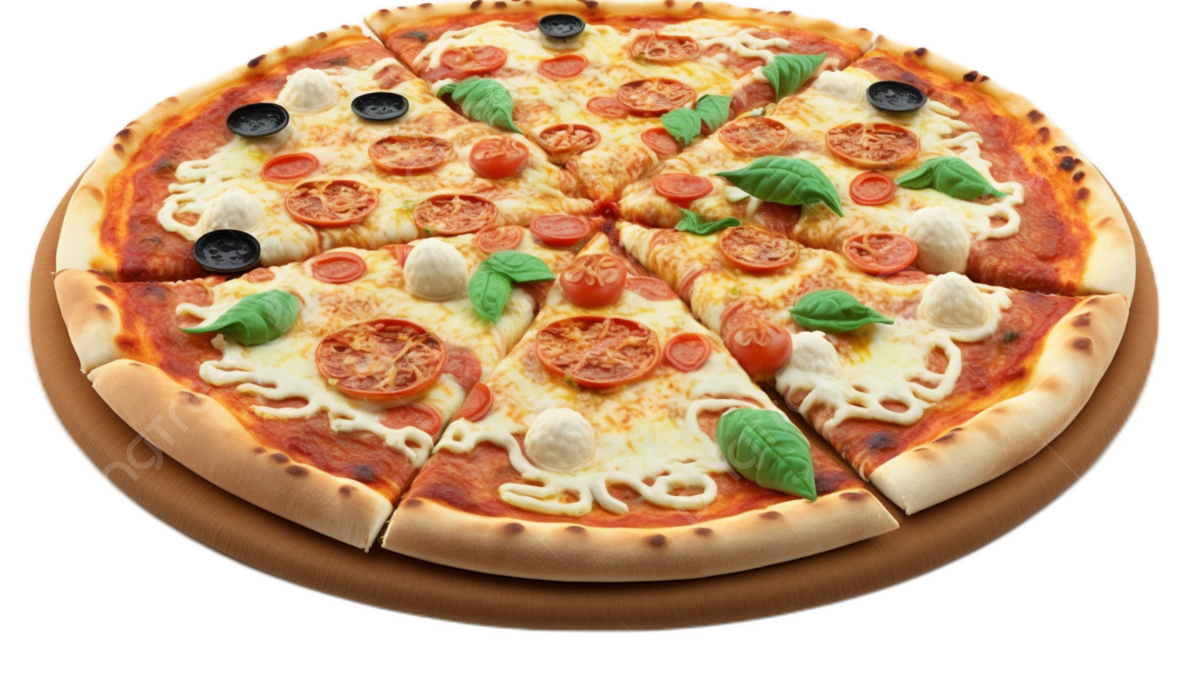

In [8]:
Image.open('/content/pizza.jpg')

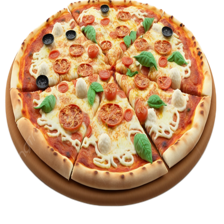

In [9]:
pizza = Image.open('/content/pizza.jpg').resize(IMAGE_SHAPE)
pizza

In [10]:
type(pizza)

PIL.Image.Image

In [11]:
pizza = np.array(pizza)/255.0 # numpy me conversion and scalling
pizza

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       ...,

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0.

In [12]:
pizza.shape

(224, 224, 4)

The shape `(224, 224, 4)` indicates that the image has four channels. In a typical RGB image, you would have three channels representing Red, Green, and Blue. However, in some cases, images can have an additional channel, often an alpha channel, which represents transparency or opacity.

So, in your case, it's likely that the image has four channels, and the last channel might represent transparency information. If you want to work with the RGB part only, you can use:

```python
rgb_image = image_array[:, :, :3]
```

This will extract the first three channels (Red, Green, Blue) from your image array, and `rgb_image` will have the shape `(224, 224, 3)`.

In [13]:
pizza = pizza[:,:,:3]

In [14]:
pizza.shape  #noe in rgb

(224, 224, 3)

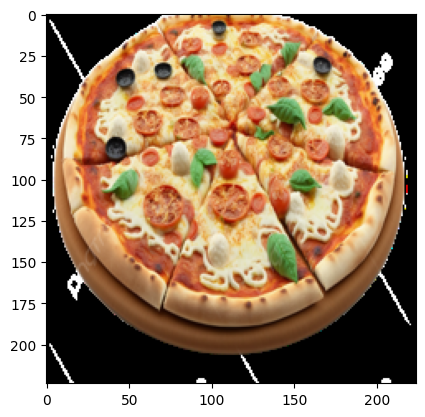

In [15]:
plt.imshow(pizza)

In [16]:
pizza[np.newaxis,...].shape # to add one new axis for prediction. Prediction accepts multiple images as an input, not only one. So model ko batane ke liye ki we want to predict just one sample, need to do this

(1, 224, 224, 3)

In [17]:
classifier.predict(pizza[np.newaxis,...])

1/1 [==============================] - 1s 675ms/step


array([[ 0.4363089 , -0.28080732,  0.7161177 , ..., -0.7497618 ,
        -1.3918982 ,  0.8306333 ]], dtype=float32)

In [18]:
result=classifier.predict(pizza[np.newaxis,...])
result.shape

1/1 [==============================] - 0s 59ms/step


(1, 1001)

In [19]:
predicted_label_index = np.argmax(result)

In [20]:
predicted_label_index

964

Now how to know which class 964 is??

In [21]:
with open("/content/ImageNetLabels.txt","r") as f:
  image_labels = f.read().splitlines() # to convert lines as an element of a list


In [22]:
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

The `.splitlines()` method in Python is used to split a string into a list of lines. It splits the input string at the line breaks (newline characters `\n`), and returns a list of the lines in the string.

For example:

```python
text = "This is line 1.
This is line 2.
This is line 3."

lines = text.splitlines()

print(lines)
```

Output:
```
['This is line 1.', 'This is line 2.', 'This is line 3.']
```

In your specific code snippet, `f.read().splitlines()` is reading the content of the file `ImageNetLabels.txt` and splitting it into a list of lines. Each element in the list corresponds to a line in the file.

In [23]:
image_labels[predicted_label_index]

'pizza'

OHHO accurate prediction. 864th index pr pizza hi tha

**Got very interesting class listed in the labels list : Electric Locomotive. Most probabilily samples taken into consideration will be foreign or us based. Let's see can it predict indian wap7 electric locomotivee**

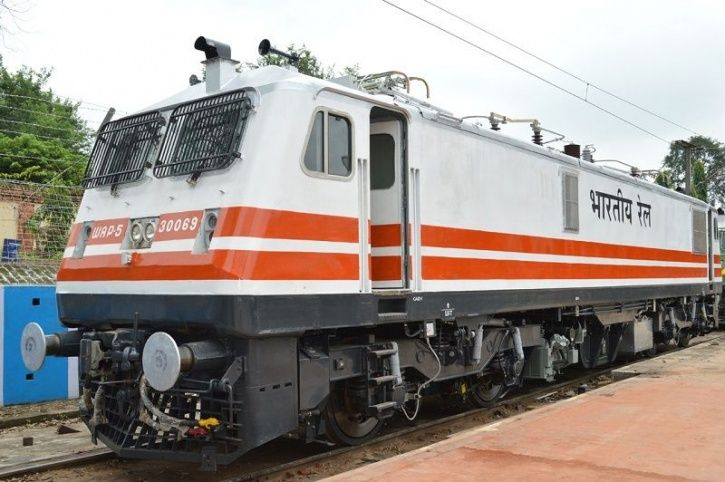

In [24]:
Image.open('/content/electric_locomototive.jpg')

In [25]:
electric_locomotive = Image.open('/content/electric_locomototive.jpg').resize(IMAGE_SHAPE)

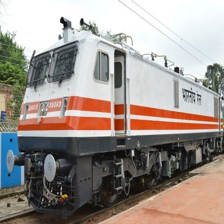

In [26]:
electric_locomotive

In [27]:
ele_loco = np.array(electric_locomotive)

In [28]:
ele_loco = ele_loco/255.0

In [29]:
ele_loco.shape # bach gye is bar 3 channel vala mila

(224, 224, 3)

In [30]:
result = classifier.predict(ele_loco[np.newaxis,...])

1/1 [==============================] - 0s 46ms/step


In [31]:
predicted_label_index = np.argmax(result)
predicted_label_index

548

In [32]:
print(image_labels[predicted_label_index])

electric locomotive


I am so surprized, it has predicted that also very correctly

**We used pretrained model and did classification straightaway**

Now let's build model using the pretrained model to predict flowers

Load flowers dataset

In [33]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 [==============================] - 1s 0us/step


In [34]:
data_dir

'./datasets/flower_photos'

In [35]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [36]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/daisy/3639009391_0f910681b7.jpg'),
 PosixPath('datasets/flower_photos/daisy/3628485766_4ff937954a_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/4897587985_f9293ea1ed.jpg'),
 PosixPath('datasets/flower_photos/daisy/4694730335_2553e77aa5_z.jpg'),
 PosixPath('datasets/flower_photos/daisy/5459481183_18d2d49e44_m.jpg')]

In [37]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [38]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/2265390547_2409007cef_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4881402397_1c664af2f7_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3556123230_936bf084a5_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3667366832_7a8017c528_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4735314389_94fe1b2a9f_n.jpg')]

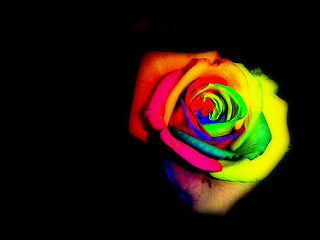

In [39]:
Image.open(str(roses[1]))

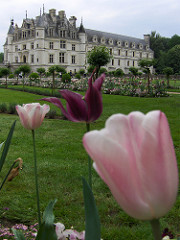

In [40]:
tulips = list(data_dir.glob('tulips/*'))
Image.open(str(tulips[0]))

**Read flowers images from disk into numpy array using opencv**


In [41]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [42]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [43]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/2265390547_2409007cef_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4881402397_1c664af2f7_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3556123230_936bf084a5_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3667366832_7a8017c528_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4735314389_94fe1b2a9f_n.jpg')]

In [44]:

str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/2265390547_2409007cef_n.jpg'

In [45]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [46]:
img.shape

(228, 320, 3)

In [47]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [48]:
X, Y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        Y.append(flowers_labels_dict[flower_name])

In [49]:
X = np.array(X)
Y = np.array(Y)


**Train test split**

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0) # by default 25% test data hota hai

Preprocessing: scale images

In [51]:
X_train_scaled = x_train / 255
X_test_scaled = x_test / 255

**Make prediction using pre-trained model on new flowers dataset**

Radimate model : but need numpy array

In [52]:
PREDICTED = classifier.predict(np.array([X[0],X[1],X[2]]))
predicted = np.argmax(PREDICTED, axis=1)

1/1 [==============================] - 1s 892ms/step


In [53]:
predicted

array([795, 550, 795])

(-0.5, 223.5, 223.5, -0.5)

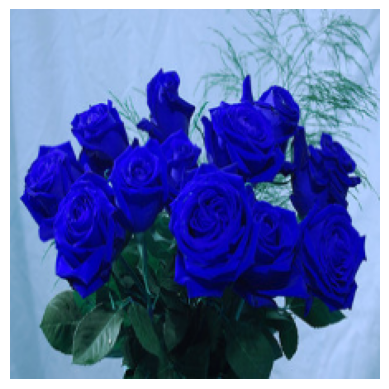

In [54]:
plt.imshow(X[0]) # seems like rose
plt.axis('off')

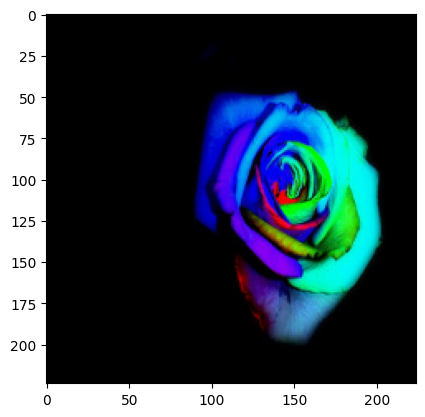

In [55]:
plt.imshow(X[1]) # again rose

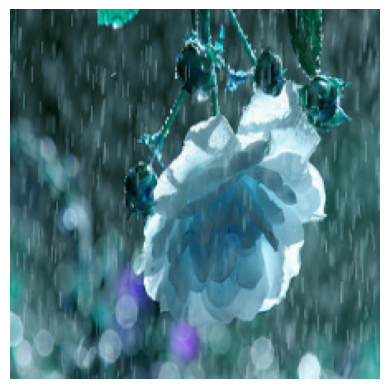

In [56]:
plt.axis('off')
plt.imshow(X[2]) # again rose

In [57]:
image_labels[795]

'shower curtain'

Ho skta hai ki ye vala flower bhi rose ke similar ho. So model ko rose na dikhkar shower curtain lg gya

but shower curtain is parda, prda , fool kaise bn gaya

In [58]:
image_labels[550]

'envelope'

ek rose , envelope lg gya

he bhagvan, teeno ke teeno predictions wrong ho gye. ek bhi flower nhi mila

# So You can not here use your redimate model, as redimade model does not have 4 out of 5 classes we have in our dataset. only daisy flower is there in radimate model. Baki 4 flowers are not available. So direction prdiction vo kya hi karenge

So It is gonna do some random guess out of available 1000 classes.

**Now I am going to retrain our model on our dataset using the pretrained model, so that it can predict the flower classes**

In [59]:
# so taking the same model as the previous one, except the last layer : feature extracted model

In [60]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)  # all layers of pretrained model, excluding the last label layer.

trainable=False  =  all the layers will have their fixed weights

In [61]:
num_of_flowers = 5

model = tf.keras.Sequential([
    pretrained_model_without_top_layer, # redimade model as it is, only last layer is mine, previous layers are already trained
    tf.keras.layers.Dense(num_of_flowers) # output layer, given by us
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)
model.fit(X_train_scaled, y_train, epochs = 5)

Deep Learning training from scratch is so expensive.

But with pretrained model, you can train your model so easily using transfer learnig

# Session is getting crashed in google colab, saying all available ram is used.

# So copy pasting the output , from the same run on another system

Epoch 1/5
 1/86 [..............................] - ETA: 0s - loss: 1.9482 - acc: 0.2188WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0080s vs `on_train_batch_end` time: 0.0130s). Check your callbacks.
WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0080s vs `on_train_batch_end` time: 0.0130s). Check your callbacks.
86/86 [==============================] - 2s 19ms/step - loss: 0.7985 - acc: 0.7028
Epoch 2/5
86/86 [==============================] - 2s 19ms/step - loss: 0.4163 - acc: 0.8517
Epoch 3/5
86/86 [==============================] - 2s 19ms/step - loss: 0.3264 - acc: 0.8895
Epoch 4/5
86/86 [==============================] - 2s 19ms/step - loss: 0.2682 - acc: 0.9106
Epoch 5/5
86/86 [==============================] - 2s 19ms/step - loss: 0.2305 - acc: 0.9266
<tensorflow.python.keras.callbacks.History at 0x1e7fc8112b0>

In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================]
 - 1s 23ms/step - loss: 0.3703 - acc: 0.8682
[0.37029528617858887, 0.8681917190551758]

so now the test accuracy is 86% by using the pretrained model. Now we can do predictions for flowers of thse 5 classes as well using this new model

* ADVICE

**If you are solving any computer vision or natural learning problem, try to see if you can use transfer learning , if you cannot then only try to build the model from scratch**